In [4]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

In [5]:
df = pd.read_csv("../data/csv/Gold_Data.csv",index_col="Business_Week")
df = df.drop(df.columns[0],axis=1)
df = df.drop(df.columns[9],axis=1)
df = df.dropna(axis=1)
df = df.dropna()

In [6]:
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)
df = df.reset_index(drop=True)
for i in range(len(df["Date"])):
    if df["Date"][i].weekday() != 1:
#         print(df["Date"][i])
        try:
            df.at[i,"Date"] = df["Date"][i-1]+timedelta(days=7)
#             print(df["Date"][i])
#             print(df["Date"][i].weekday())
        except:
            df.at[i,"Date"] = df["Date"][i+1]-timedelta(days=7)
# print(df.iloc[29,:])
df.set_index("Date",inplace=True)
df = df.asfreq("W-TUE")

In [7]:
df.head()

,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Open Interest,Money Manager Shorts,Money Manager Longs,Producer/Merchant/Processor/User Longs,Producer/Merchant/Processor/User Shorts,Ten_Yr_Futures_Settle,Ten_Yr_Futures_Volume,Ten_Yr_Futures_Prev. Day Open Interest,USD_Change,USD_Settle,USD_Volume,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle
Date,,,,,,,,,,,,,,,,,
2006-06-13,602.80,324.800000,189517.8,382474.0,30916.0,103211.0,42587.0,128892.0,105.86250,34971.6,1935826.00,1.760,85.7620,7364.2,38753.4,0.0760,6.7790
2006-06-20,570.50,78.400000,191302.8,390281.0,30963.0,94632.0,47440.0,126992.0,105.01875,10278.8,2003874.80,0.013,86.2112,772.6,37679.6,0.1175,6.9283
2006-06-27,584.18,51.800000,189599.0,384321.0,32287.0,91042.0,48449.0,121890.0,104.33125,547949.0,2151127.00,0.340,86.0000,5056.2,23433.4,0.1715,7.4125
2006-07-04,594.40,31923.666667,297778.0,392868.0,30452.0,92545.0,48087.0,122568.0,104.53125,663508.5,2168869.75,-1.300,85.2640,2935.2,19682.8,-0.2920,7.1685
2006-07-11,634.00,43180.200000,253799.8,427008.0,27624.0,104213.0,54509.0,130618.0,104.71250,791971.0,2154420.80,0.230,85.0220,2823.0,19415.6,0.0960,7.1820


In [8]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_df,index=df.index,columns=df.columns)
normalized_df.tail()

,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Open Interest,Money Manager Shorts,Money Manager Longs,Producer/Merchant/Processor/User Longs,Producer/Merchant/Processor/User Shorts,Ten_Yr_Futures_Settle,Ten_Yr_Futures_Volume,Ten_Yr_Futures_Prev. Day Open Interest,USD_Change,USD_Settle,USD_Volume,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle
Date,,,,,,,,,,,,,,,,,
2019-06-25,0.642375,0.000213,0.838001,0.896227,0.132261,0.768512,0.314874,0.413292,0.762123,0.337836,0.833242,0.308990,0.772377,0.302506,0.257492,0.346381,0.770509
2019-07-02,0.653581,0.638746,0.866338,0.919575,0.087021,0.779756,0.318265,0.461023,0.767217,0.351378,0.819600,0.621499,0.773950,0.160894,0.236145,0.307765,0.750169
2019-07-09,0.652374,0.901536,0.864804,0.889398,0.123541,0.713883,0.325395,0.469911,0.759500,0.372514,0.810009,0.650095,0.798327,0.126266,0.217605,0.450834,0.746900
2019-07-16,0.656941,0.766362,0.743349,0.929922,0.144608,0.739864,0.457069,0.482642,0.743073,0.372449,0.812688,0.521777,0.796716,0.165801,0.229606,0.336252,0.728432
2019-07-23,0.667974,0.906160,0.669613,1.000000,0.143675,0.730045,0.524552,0.501600,0.755196,0.313134,0.823465,0.584983,0.803737,0.197475,0.220226,0.402406,0.722794


In [9]:
train = normalized_df.iloc[:int(.8*(len(normalized_df.index)))]
test = normalized_df.iloc[int(.8*(len(normalized_df.index))):]

In [10]:
model = VECM(train,k_ar_diff=3,coint_rank=1)

In [11]:
vecm = model.fit()
vecm.gamma.round(4)
vecm.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.Gold_Settle,0.1169,0.059,1.976,0.048,0.001,0.233
L1.Gold_Volume,0.0042,0.010,0.427,0.670,-0.015,0.023
L1.Gold_Prev. Day Open Interest,-0.0011,0.008,-0.132,0.895,-0.017,0.015
L1.Open Interest,0.0029,0.026,0.109,0.913,-0.049,0.054
L1.Money Manager Shorts,-0.0124,0.031,-0.396,0.692,-0.074,0.049
L1.Money Manager Longs,0.0698,0.030,2.323,0.020,0.011,0.129
L1.Producer/Merchant/Processor/User Longs,-0.0059,0.024,-0.242,0.809,-0.054,0.042
L1.Producer/Merchant/Processor/User Shorts,-0.0032,0.042,-0.076,0.940,-0.085,0.079
L1.Ten_Yr_Futures_Settle,0.0892,0.032,2.813,0.005,0.027,0.151
L1.Ten_Yr_Futures_Volume,0.0111,0.009,1.188,0.235,-0.007,0.030


In [12]:
predictions = vecm.predict(steps=len(test.index))
predictions = pd.DataFrame(predictions,index=test.index,columns=test.columns)
predictions.head()

,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Open Interest,Money Manager Shorts,Money Manager Longs,Producer/Merchant/Processor/User Longs,Producer/Merchant/Processor/User Shorts,Ten_Yr_Futures_Settle,Ten_Yr_Futures_Volume,Ten_Yr_Futures_Prev. Day Open Interest,USD_Change,USD_Settle,USD_Volume,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle
Date,,,,,,,,,,,,,,,,,
2016-12-13,0.458665,-0.269734,0.351359,0.320126,0.358353,0.347507,0.157319,0.170904,0.648658,0.117590,0.579325,0.525299,0.919386,0.494091,0.657466,0.432299,0.698992
2016-12-20,0.457724,-0.289433,0.372063,0.338144,0.338156,0.343413,0.157540,0.177424,0.655215,0.126316,0.567028,0.428828,0.905199,0.414850,0.515149,0.337483,0.705826
2016-12-27,0.453774,-0.193794,0.417083,0.336898,0.347051,0.350348,0.151118,0.174830,0.625455,0.318879,0.552009,0.619915,0.910932,0.446886,0.546027,0.434954,0.704703
2017-01-03,0.450749,-0.029541,0.532734,0.395526,0.353323,0.354378,0.178176,0.189317,0.629590,0.252627,0.555024,0.537217,0.916067,0.447111,0.559346,0.406043,0.702125
2017-01-10,0.451825,0.180003,0.663504,0.428773,0.358639,0.359005,0.207216,0.211893,0.633018,0.240103,0.555885,0.555497,0.923462,0.496829,0.590837,0.416939,0.710053


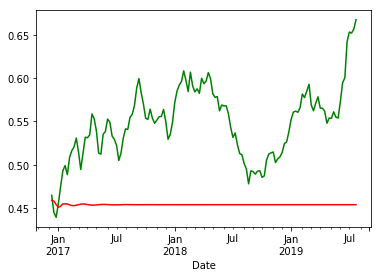

In [15]:
ax1 = test["Gold_Settle"].plot(color="green")
ax2 = predictions["Gold_Settle"].plot(color="red")

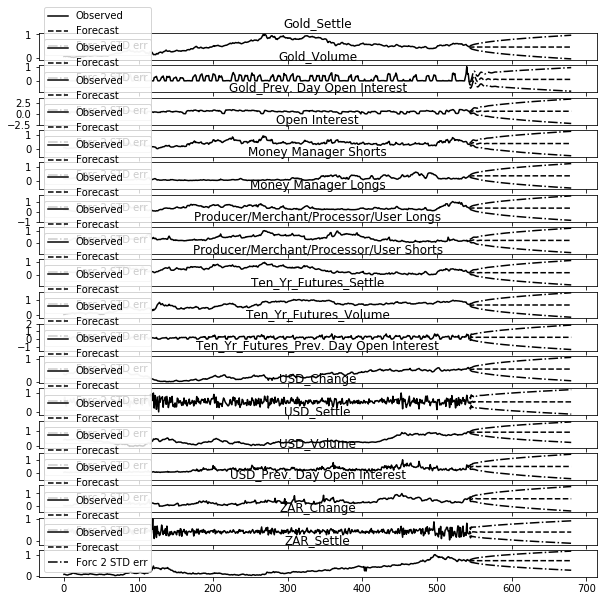

In [14]:
vecm.plot_forecast(steps=len(test.index))